In [4]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import warnings
warnings.filterwarnings('ignore')


In [5]:
# preprocess the data
df = pd.read_csv('HistoricalQuotes.csv')

#Standardize column
df.columns = [col.strip() for col in df.columns]
df = df.rename(columns={'Close/Last': 'Close', 'Date': 'Date'})


df['Close'] = df['Close'].replace('[\$,]', '', regex=True).astype(float)
df['Date'] = pd.to_datetime(df['Date'])

df = df.sort_values('Date')

 #previous day's closing price
df['Prev_Close'] = df['Close'].shift(1)
df = df.dropna()

#features and target
X = df[['Prev_Close']]
y = df['Close']

#Scale
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)


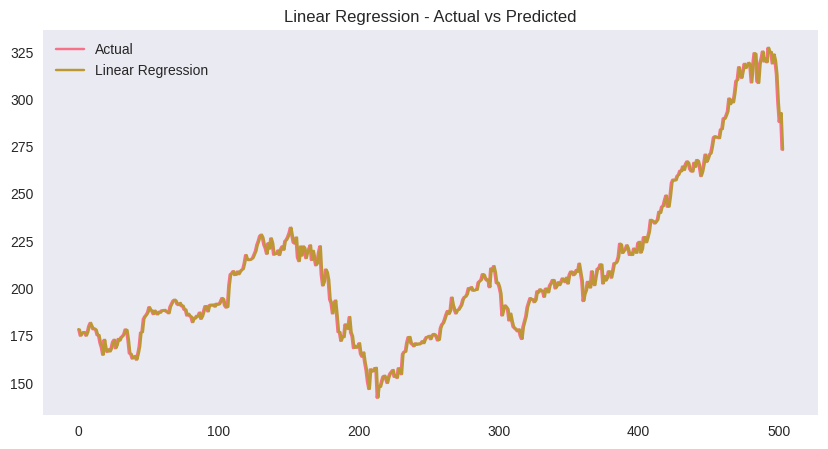

Linear Regression RMSE: 3.6982173426824265


In [6]:
#Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual')
plt.plot(lr_pred, label='Linear Regression')
plt.title('Linear Regression - Actual vs Predicted')
plt.legend()
plt.grid()
plt.show()


print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, lr_pred)))


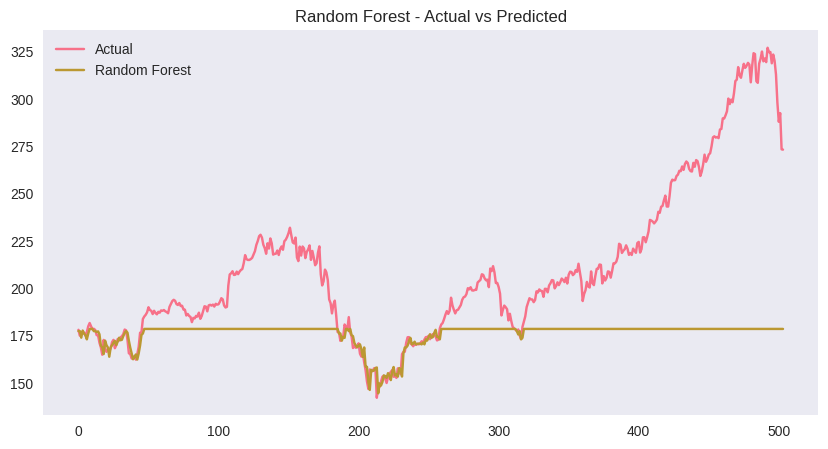

Random Forest RMSE: 51.64330186470242


In [7]:
#Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual')
plt.plot(rf_pred, label='Random Forest')
plt.title('Random Forest - Actual vs Predicted')
plt.legend()
plt.grid()
plt.show()


print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


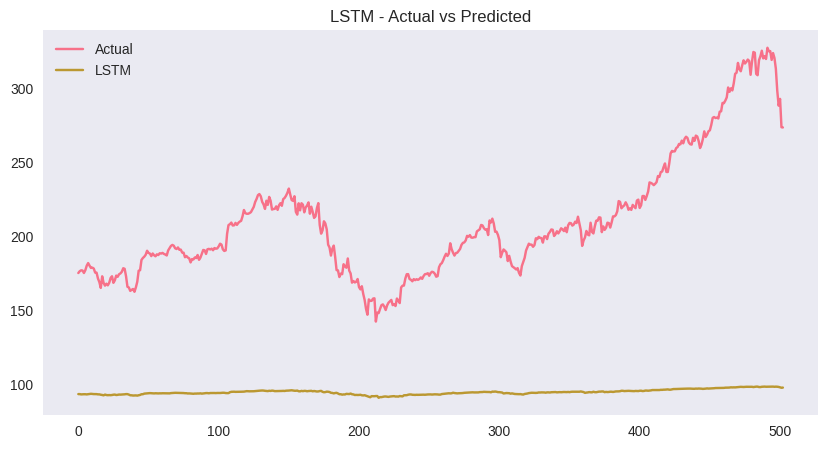

LSTM RMSE: 122.08698603477914


In [8]:
#LSTM
#Reformat for LSTM input shape (samples, time_steps, features)
X_lstm = []
for i in range(1, len(X_scaled)):
    X_lstm.append([X_scaled[i-1]])
X_lstm = np.array(X_lstm)
y_lstm = y.values[1:]

#Split
X_train_lstm = X_lstm[:len(X_train)]
X_test_lstm = X_lstm[len(X_train):]
y_train_lstm = y_lstm[:len(X_train)]
y_test_lstm = y_lstm[len(X_train):]

#Build
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(1,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

#Train
model.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=16, verbose=0)

#Predict
lstm_pred = model.predict(X_test_lstm)


plt.figure(figsize=(10,5))
plt.plot(y_test_lstm, label='Actual')
plt.plot(lstm_pred, label='LSTM')
plt.title('LSTM - Actual vs Predicted')
plt.legend()
plt.grid()
plt.show()


print("LSTM RMSE:", np.sqrt(mean_squared_error(y_test_lstm, lstm_pred)))
